# **Actividad Final**



# Análisis de las variedades Vinos en Catalunya


# 1. Introducción
En este proyecto, analizaremos los datos de producción de vino en Catalunya a lo largo de varios años. Utilizaremos Python y bibliotecas como pandas, matplotlib y scipy para limpiar, analizar y visualizar los datos.

### Objetivos del Análisis
El objetivo principal de este proyecto es explorar y analizar los datos de los vinos en Catalunya para extraer conclusiones útiles y crear visualizaciones informativas. Las acciones concretas incluirán:

- **Tratamiento de Datos:** Gestionar valores nulos, transformar datos si es necesario, y preparar el conjunto de datos para el análisis.

- **Exploración de Datos:** Realizar una inspección inicial del conjunto de datos para entender mejor sus características y estructura.

- **Análisis Estadístico:** Obtener estadísticas descriptivas de las variables más relevantes.

- **Visualización de Datos:** Crear visualizaciones utilizando Matplotlib para ilustrar los resultados del análisis.

# 2. Importar Bibliotecas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

### Breve Descripción del Conjunto de Datos
El conjunto de datos que utilizaremos en este proyecto proviene de un archivo CSV denominado Registre_Vitivin_cola_de_Catalunya__e-RVC_.csv y contiene información detallada sobre los vinos en Catalunya. Este dataset incluye datos sobre diversas características de los vinos, como su contenido de alcohol, precio, región de origen, y otras propiedades relevantes. Los datos han sido recopilados a partir de diferentes bodegas y registros de producción de vino en la región.

Podeis descargarlos aquí: https://datos.gob.es/en/catalogo/a09002970-registro-vitivinicola-de-cataluna-e-rvc

o usar el archivo que se adjuntará.




# 2. Exploración de Datos
## 2.1 Carga del Conjunto de Datos
Para comenzar, cargaremos el conjunto de datos utilizando pandas en Python:

In [3]:
file_path = 'Registre_Vitivin_cola_de_Catalunya__e-RVC_.csv'
data = pd.read_csv(file_path)

data_cleaned = data.dropna()

# Convertir la columna 'CAMPANYA' a numérica, forzando errores a NaN y luego eliminarlos
data_cleaned.loc[:, 'CAMPANYA'] = pd.to_numeric(data_cleaned['CAMPANYA'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['CAMPANYA'])
data_cleaned.loc[:, 'CAMPANYA'] = data_cleaned['CAMPANYA'].astype(int)

print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 151152 entries, 0 to 151457
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CODI_PV            151152 non-null  object 
 1   CODI_IDESCAT       151152 non-null  int64  
 2   MUNICIPI           151152 non-null  object 
 3   CODI_PROVINCIA     151152 non-null  int64  
 4   CODI_MUNICIPI      151152 non-null  int64  
 5   POLIGON            151152 non-null  int64  
 6   PARCEL·LA          151152 non-null  int64  
 7   RECINTE            151152 non-null  int64  
 8   PERCENTATGE        151152 non-null  float64
 9   SUP_VI_RECINTE     151152 non-null  int64  
 10  SUP_TOTAL_GRAFICA  151152 non-null  int64  
 11  VARIETAT           151152 non-null  object 
 12  CAMPANYA           151152 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 16.1+ MB
None
  CODI_PV  CODI_IDESCAT MUNICIPI  CODI_PROVINCIA  CODI_MUNICIPI  POLIGON  \
0   AA001      

Podemos ver que hay una buena integridad de los datos, todas las columnas tienen valores completos, sin datos faltantes.

Los datos muestran diferentes combinaciones de variedades de uva **(VARIETAT)** y superficies de viñedos **(SUP_VI_RECINTE, SUP_TOTAL_GRAFICA)**, lo que permitirá explorar la diversidad y extensión de los viñedos en Catalunya.

La columna **PERCENTATGE** parece estar bien definida con valores de porcentaje que representan la proporción de viñedo en el recinte, con ejemplos que varían desde valores bajos **(5.377)** hasta casi completos **(99.999)**.

Las columnas **MUNICIPI, VARIETAT, y CODI_PV** están en formato de cadena de texto **(object)**, lo cual es adecuado para información categórica y de identificación.


## 2.2 Inspección Inicial
Vamos a inspeccionar el dataset para comprender su estructura y características principales.

In [5]:
print(data_cleaned.describe())

print(data_cleaned.nunique())

        CODI_IDESCAT  CODI_PROVINCIA  CODI_MUNICIPI        POLIGON  \
count  151152.000000   151152.000000  151152.000000  151152.000000   
mean   294180.070525       29.296853   29419.988541      15.889151   
std    163090.538894       16.354047   16309.502004      37.853113   
min     80018.000000        8.000000    8001.000000       1.000000   
25%     82704.000000        8.000000    8270.000000       5.000000   
50%    430228.000000       43.000000   43022.000000       9.000000   
75%    430825.000000       43.000000   43083.000000      19.000000   
max    439076.000000       43.000000   43900.000000     998.000000   

           PARCEL·LA        RECINTE   PERCENTATGE  SUP_VI_RECINTE  \
count  151152.000000  151152.000000  1.511520e+05   151152.000000   
mean      589.995733      16.285236  7.317138e+34     5026.513847   
std      2509.407206      86.900652  2.686366e+36     7685.786649   
min         1.000000       1.000000  0.000000e+00        1.000000   
25%        15.000000    

#### **Resultados**
##### **Amplitud de Cobertura Geográfica:**

El dataset cubre una amplia gama de municipios y parcelas, lo que sugiere que la base de datos es exhaustiva y representa bien la distribución de los viñedos en Catalunya.

**Variedad de Vinos:**

Con 88 variedades diferentes de vino, la región muestra una notable diversidad en la producción de vino, lo que puede ser un indicador de la riqueza agrícola y las prácticas vitivinícolas diversas.

**Superficies y Porcentajes:**

La mayoría de los viñedos tienen superficies relativamente pequeñas, pero hay algunos muy grandes que afectan la media. La mayoría de las parcelas tienen un porcentaje de viñedo muy alto, lo que indica que la tierra está intensamente utilizada para la producción de vino.

**Análisis Temporal:**

La disponibilidad de datos de 124 años de campaña permite realizar análisis temporales profundos, identificando tendencias y cambios en la producción de vino a lo largo del tiempo.

# 3. Análisis Estadístico
Obtenemos estadísticas descriptivas de las variables más relevantes.

## 3.1 Análisis de la Distribución de la Superficie del Viñedo


In [7]:
# Estadísticas descriptivas de la superficie del viñedo
sup_vi_stats = data_cleaned['SUP_VI_RECINTE'].describe()
print("Estadísticas descriptivas de la superficie del viñedo:")
print(sup_vi_stats)

# Calcular percentiles adicionales
percentiles = data_cleaned['SUP_VI_RECINTE'].quantile([0.25, 0.5, 0.75])
print("\nPercentiles de la superficie del viñedo:")
print(percentiles)


Estadísticas descriptivas de la superficie del viñedo:
count    151152.000000
mean       5026.513847
std        7685.786649
min           1.000000
25%         704.000000
50%        2679.000000
75%        6290.000000
max       99413.000000
Name: SUP_VI_RECINTE, dtype: float64

Percentiles de la superficie del viñedo:
0.25     704.0
0.50    2679.0
0.75    6290.0
Name: SUP_VI_RECINTE, dtype: float64


### **Resultados**

**Variabilidad en la Superficie del Viñedo:**

La superficie del viñedo varía significativamente, desde parcelas muy pequeñas (1 m²) hasta parcelas extremadamente grandes (99,413 m²). Esta amplia variabilidad se refleja en la alta desviación estándar de 7,685.79 m².

**Distribución Sesgada:**

La media de 5,026.51 m² es considerablemente mayor que la mediana de 2,679 m², lo que indica una distribución sesgada hacia la derecha. Esto sugiere que mientras la mayoría de las parcelas tienen superficies relativamente pequeñas, hay algunas parcelas muy grandes que elevan la media.

**Concentración de Parcelas Pequeñas y Medianas:**

Los percentiles adicionales muestran que el 25% de las parcelas tiene superficies superficies de 704 m² o menores, y el 75% tiene superficies menores o iguales a 6,290 m². Esto confirma que una gran parte de las parcelas son de tamaño pequeño a mediano.

## **Implicaciones para el Análisis**

**Segmentación del Análisis:**

Dada la amplia variabilidad en la superficie del viñedo, sería útil segmentar el análisis en categorías de tamaño (pequeño, mediano y grande) para identificar patrones específicos dentro de cada segmento.



## 3.2 Análisis de las Variedades de Vino


In [56]:
# Contar el número de vinos por variedad y calcular porcentajes
variety_counts = data_cleaned['VARIETAT'].value_counts()
variety_percentages = variety_counts / variety_counts.sum() * 100

print("\nConteo y porcentaje de vinos por combinaciones de variedad:")
print(pd.DataFrame({'Conteo': variety_counts, 'Porcentaje': variety_percentages}).head(10))

# Separar las variedades combinadas en una lista de todas las variedades individuales
varieties_list = data_cleaned['VARIETAT'].str.split(',').explode()

# Contar el número de vinos por variedad individual y calcular porcentajes
variety_counts = varieties_list.value_counts()
variety_percentages = variety_counts / variety_counts.sum() * 100

print("\nConteo y porcentaje de vinos por variedad:")
print(pd.DataFrame({'Conteo': variety_counts, 'Porcentaje': variety_percentages}).head(10))



Conteo y porcentaje de vinos por combinaciones de variedad:
                                                    Conteo  Porcentaje
VARIETAT                                                              
Macabeu,Viura                                        30888   20.435059
Xarel.lo,Pansa blanca,Pansal,Cartoixà                25793   17.064280
Parellada,Montonega,Montonec                         18048   11.940299
Garnatxa negra,Lledoner                              17876   11.826506
Garnatxa blanca,Lledoner blanc                        9879    6.535805
Cariñena,Mazuela,Samsó                                9126    6.037631
Merlot                                                5226    3.457447
Cabernet Sauvignon                                    4867    3.219938
Syrah                                                 4676    3.093575
Ull de llebre,Tempranillo,Cencibel,Tinto fino,T...    4526    2.994337

Conteo y porcentaje de vinos por variedad:
                Conteo  Porcentaje
VARIETAT

### **Resultados**

**Combinaciones Dominantes:** Las combinaciones como "Macabeu, Viura" y "Xarel.lo, Pansa blanca, Pansal, Cartoixà" son altamente representativas, reflejando la preferencia por ciertas mezclas en la producción vinícola de Catalunya.

**Variedades Individuales:**
Variedades Principales: Macabeu y Viura, cada una con un 8.21% del total, son las variedades individuales más comunes, seguidas por Xarel.lo, Pansa blanca, Pansal y Cartoixà, cada una con un 6.86%.

#### **Implicaciones para el Análisis**

**Análisis Detallado:** Al segmentar tanto las combinaciones como las variedades individuales, se pueden identificar patrones específicos y tendencias en la producción vinícola, lo que es crucial para decisiones estratégicas en producción y marketing.

## 3.3 Análisis Temporal de la Producción


In [43]:
# Agrupar los datos por año y calcular el número total de registros por año
yearly_counts = data_cleaned.groupby('CAMPANYA').size()

print("\nNúmero de vinos por año:")
print(yearly_counts)

# Calcular estadísticas descriptivas de la producción anual
yearly_stats = yearly_counts.describe()
print("\nEstadísticas descriptivas de la producción anual:")
print(yearly_stats)



Número de vinos por año:
CAMPANYA
1900     163
1901      28
1902      22
1903       3
1904       5
        ... 
2019    5025
2020    5112
2021    4059
2022    1594
2023     154
Length: 123, dtype: int64

Estadísticas descriptivas de la producción anual:
count     123.000000
mean     1228.878049
std      1735.930216
min         1.000000
25%        36.500000
50%       290.000000
75%      1911.500000
max      6466.000000
dtype: float64


#### **Resultados**
**Variabilidad Temporal:**

La producción de vino ha variado significativamente a lo largo de los años. El número de registros anuales varía desde un mínimo de 1 hasta un máximo de 6,466.

**Tendencia General:**

El promedio anual de registros de producción de vino es de aproximadamente 1,229.

Sin embargo, la mediana (290) es mucho menor que la media, lo que indica una distribución sesgada hacia la derecha, con algunos años de producción excepcionalmente alta que elevan la media.

**Desviación Estándar:**

La alta desviación estándar de aproximadamente 1,736 refleja una variabilidad significativa en la producción anual de vino.

**Cuartiles:**

El 25% de los años tiene 36.5 registros o menos, mientras que el 75% de los años tiene 1,911.5 registros o menos. Esto sugiere que la mayoría de los años tienen una producción relativamente baja, con algunos años de alta producción que distorsionan la percepción general.

## 3.4 Análisis de Correlación entre Superficie del Viñedo y Superficie Total Gráfica


In [31]:
# Calcular la correlación entre 'SUP_VI_RECINTE' y 'SUP_TOTAL_GRAFICA'
correlation = data_cleaned[['SUP_VI_RECINTE', 'SUP_TOTAL_GRAFICA']].corr()

print("\nCorrelación entre superficie del viñedo y superficie total gráfica:")
print(correlation)



Correlación entre superficie del viñedo y superficie total gráfica:
                   SUP_VI_RECINTE  SUP_TOTAL_GRAFICA
SUP_VI_RECINTE           1.000000           0.363547
SUP_TOTAL_GRAFICA        0.363547           1.000000


#### **Interpretación de la Correlación:**

Correlación entre **SUP_VI_RECINTE y SUP_TOTAL_GRAFICA:** 0.363547

Esta correlación positiva indica que existe una relación moderada entre la superficie del viñedo y la superficie total gráfica.

En otras palabras, a medida que la superficie del viñedo aumenta, también tiende a aumentar la superficie total gráfica, aunque no de manera muy fuerte.

# 4. Visualización de Datos
Crearemos visualizaciones para ilustrar los resultados del análisis.

## 4.1 Gráficos de la Superficie del Viñedo


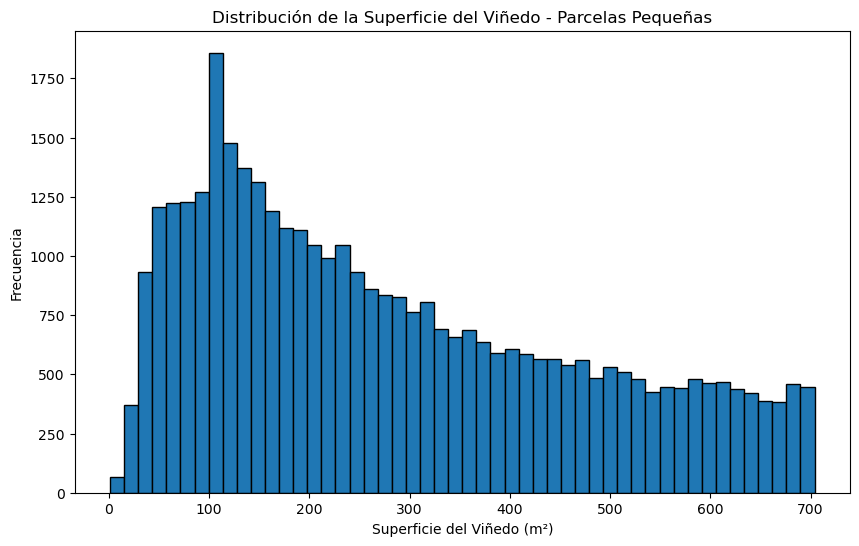

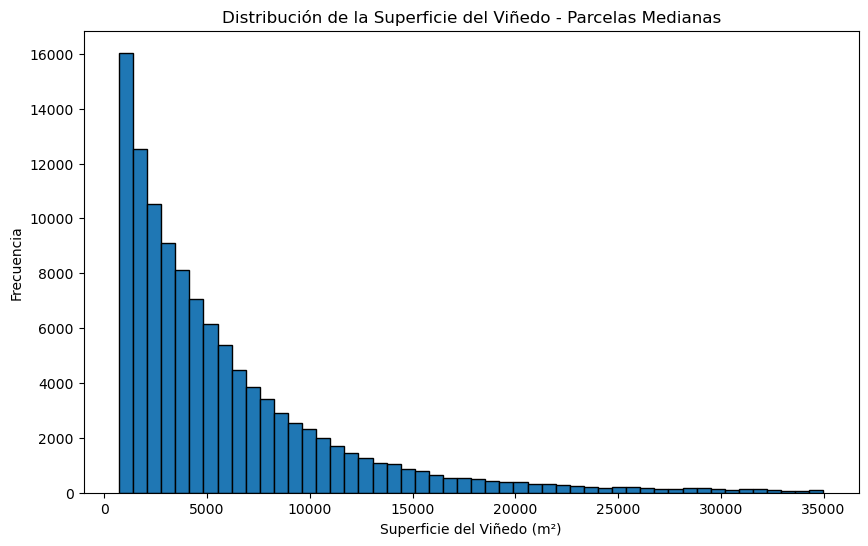

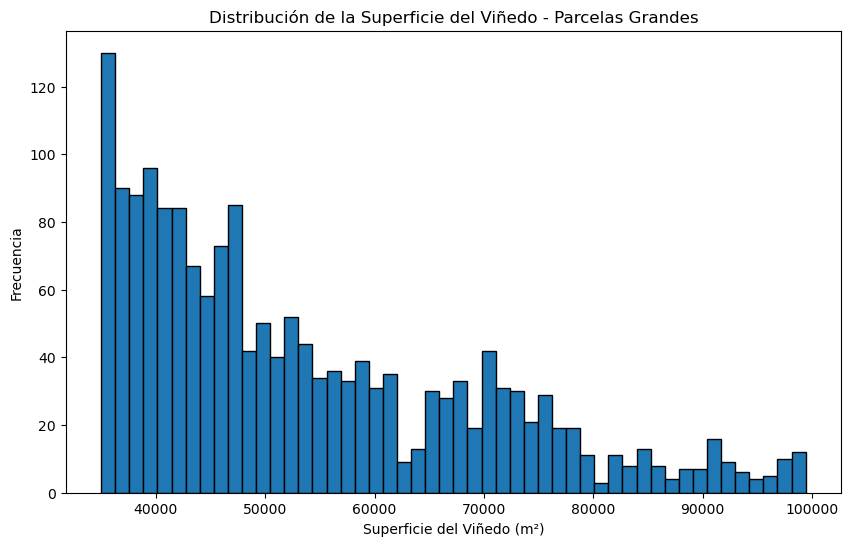

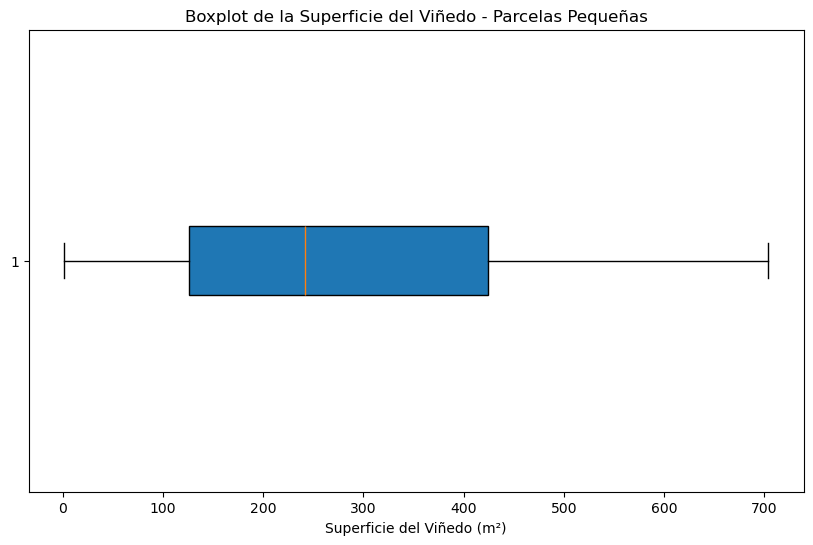

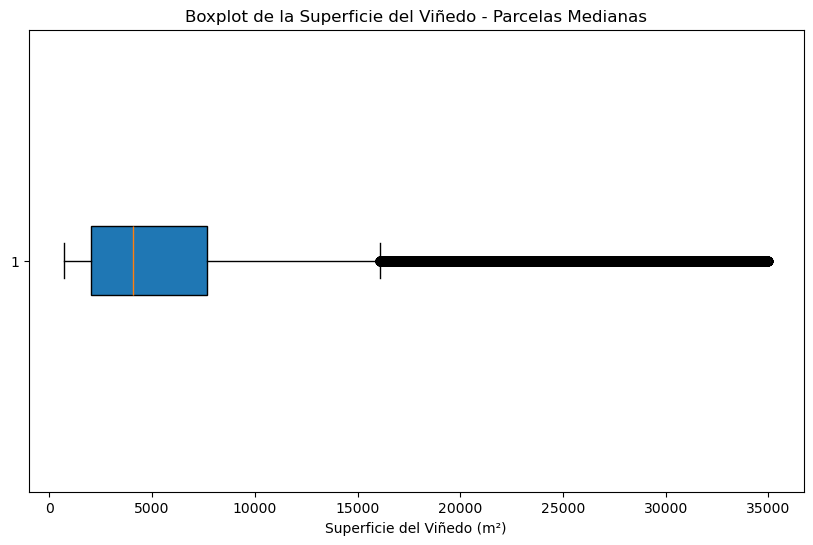

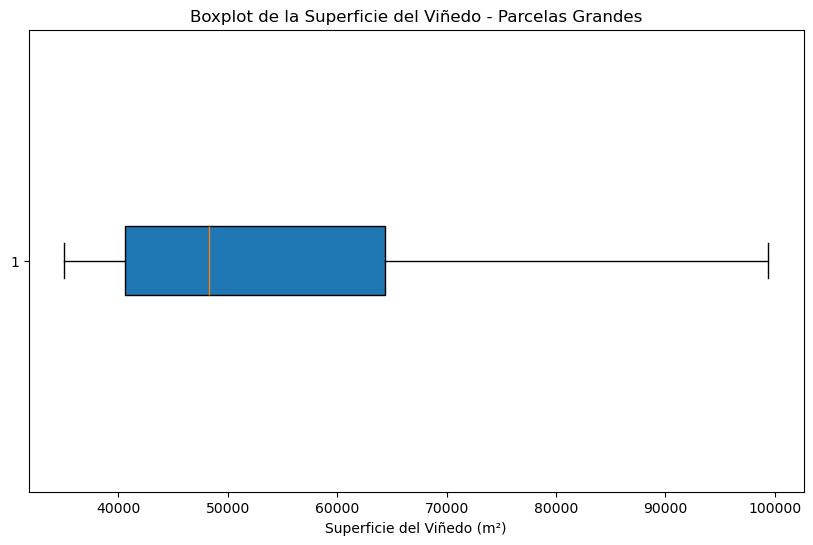

In [9]:

# Segmentar las superficies del viñedo
data_cleaned.loc[:, 'Segmento'] = pd.cut(data_cleaned['SUP_VI_RECINTE'],
                                  bins=[0, 704, 34999, data_cleaned['SUP_VI_RECINTE'].max()],
                                  labels=['Pequeñas', 'Medianas', 'Grandes'])

# Histograma para parcelas pequeñas
plt.figure(figsize=(10, 6))
subset = data_cleaned[data_cleaned['Segmento'] == 'Pequeñas']
plt.hist(subset['SUP_VI_RECINTE'], bins=50, edgecolor='black')
plt.title('Distribución de la Superficie del Viñedo - Parcelas Pequeñas')
plt.xlabel('Superficie del Viñedo (m²)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para parcelas medianas
plt.figure(figsize=(10, 6))
subset = data_cleaned[data_cleaned['Segmento'] == 'Medianas']
plt.hist(subset['SUP_VI_RECINTE'], bins=50, edgecolor='black')
plt.title('Distribución de la Superficie del Viñedo - Parcelas Medianas')
plt.xlabel('Superficie del Viñedo (m²)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para parcelas grandes
plt.figure(figsize=(10, 6))
subset = data_cleaned[data_cleaned['Segmento'] == 'Grandes']
plt.hist(subset['SUP_VI_RECINTE'], bins=50, edgecolor='black')
plt.title('Distribución de la Superficie del Viñedo - Parcelas Grandes')
plt.xlabel('Superficie del Viñedo (m²)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para parcelas pequeñas
plt.figure(figsize=(10, 6))
subset = data_cleaned[data_cleaned['Segmento'] == 'Pequeñas']
plt.boxplot(subset['SUP_VI_RECINTE'], vert=False, patch_artist=True)
plt.title('Boxplot de la Superficie del Viñedo - Parcelas Pequeñas')
plt.xlabel('Superficie del Viñedo (m²)')
plt.show()

# Boxplot para parcelas medianas
plt.figure(figsize=(10, 6))
subset = data_cleaned[data_cleaned['Segmento'] == 'Medianas']
plt.boxplot(subset['SUP_VI_RECINTE'], vert=False, patch_artist=True)
plt.title('Boxplot de la Superficie del Viñedo - Parcelas Medianas')
plt.xlabel('Superficie del Viñedo (m²)')
plt.show()

# Boxplot para parcelas grandes
plt.figure(figsize=(10, 6))
subset = data_cleaned[data_cleaned['Segmento'] == 'Grandes']
plt.boxplot(subset['SUP_VI_RECINTE'], vert=False, patch_artist=True)
plt.title('Boxplot de la Superficie del Viñedo - Parcelas Grandes')
plt.xlabel('Superficie del Viñedo (m²)')
plt.show()


### **Resultados**

**Parcelas Pequeñas:**

Predominan parcelas menores a 300 m², con una concentración significativa alrededor de los 100 m².
La distribución es bastante uniforme dentro del rango pequeño, sin outliers significativos.

**Parcelas Medianas:**

Hay una alta frecuencia de parcelas menores a 10,000 m².
La distribución tiene una cola larga y varios picos secundarios.
Existen numerosos outliers en la parte alta del rango, sugiriendo una variabilidad significativa en las parcelas medianas.

**Parcelas Grandes:**

La mayoría de las parcelas grandes están entre 35,000 m² y 70,000 m².
La distribución es más concentrada, con menos outliers significativos.
La mediana y el IQR indican que la mayoría de las parcelas grandes están dentro de un rango relativamente estrecho en comparación con las medianas.

## **Implicaciones**

**Planificación Agrícola:** La alta variabilidad en las parcelas medianas puede requerir enfoques personalizados en la gestión y planificación agrícola.

**Conservación y Uso del Suelo:** Las parcelas pequeñas, al ser numerosas y uniformemente distribuidas, pueden representar áreas de producción intensiva que podrían beneficiarse de prácticas agrícolas sostenibles.

**Inversiones y Desarrollo:** Las parcelas grandes, al ser menos frecuentes pero más homogéneas, pueden representar oportunidades para inversiones a gran escala en la producción de vino.

### 4.2 Gráfico de Barras de las Variedades de Vino


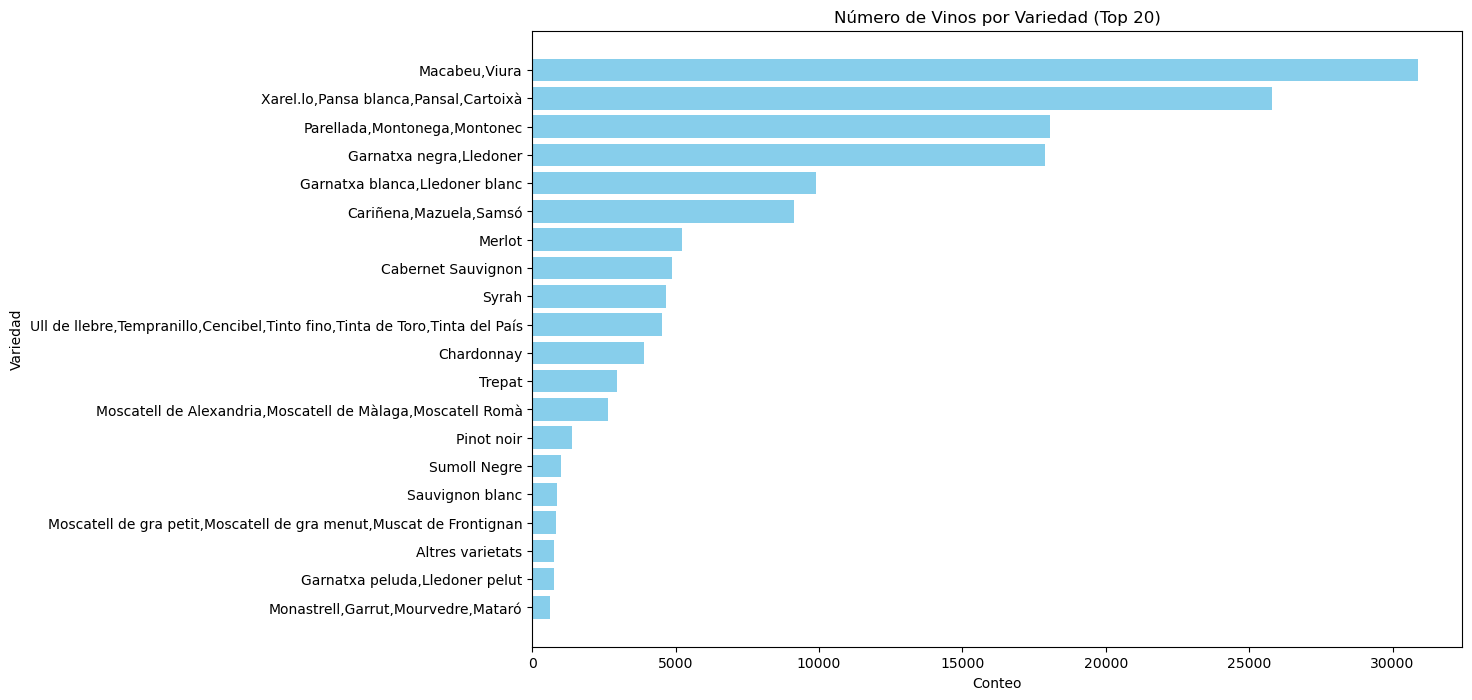

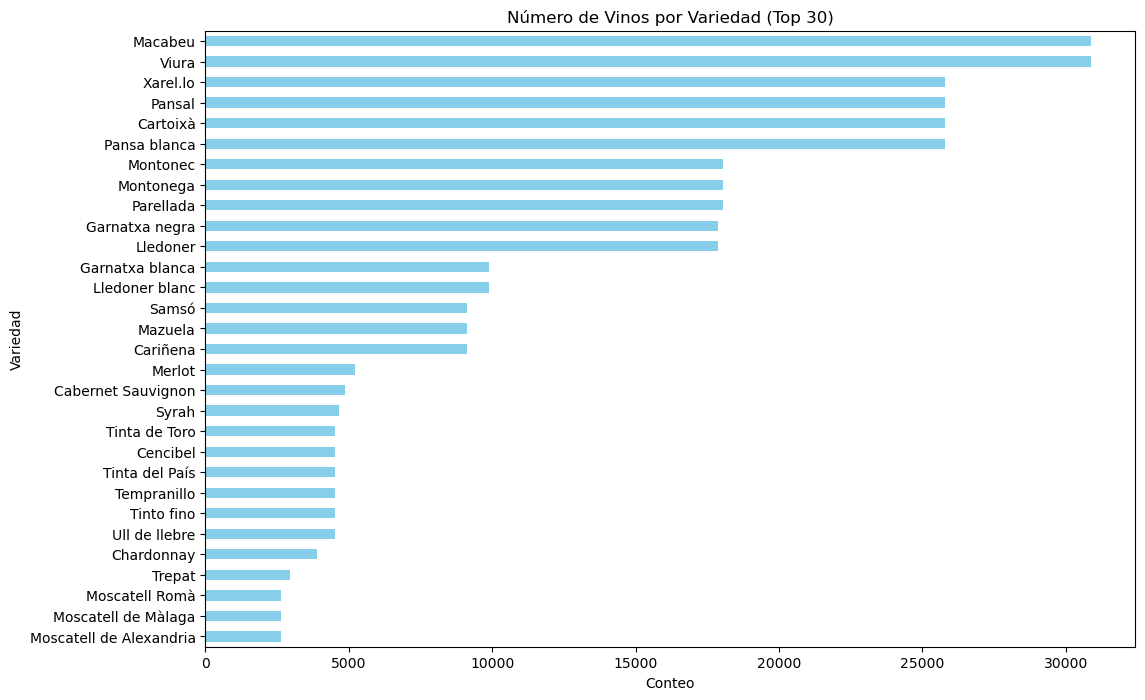

In [11]:
top_varieties = data_cleaned['VARIETAT'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
plt.barh(top_varieties.index, top_varieties.values, color='skyblue')
plt.title('Número de Vinos por Variedad (Top 20)')
plt.xlabel('Conteo')
plt.ylabel('Variedad')
plt.gca().invert_yaxis()
plt.show()


# Separar las variedades combinadas en una lista de todas las variedades individuales
varieties_list = data_cleaned['VARIETAT'].str.split(',').explode()

# Contar el número de vinos por variedad individual y calcular porcentajes
variety_counts = varieties_list.value_counts()
variety_percentages = variety_counts / variety_counts.sum() * 100

# Graficar las 20 variedades más comunes
plt.figure(figsize=(12, 8))
variety_counts.head(30).plot(kind='barh', color='skyblue')
plt.title('Número de Vinos por Variedad (Top 30)')
plt.xlabel('Conteo')
plt.ylabel('Variedad')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la barra más alta en la parte superior
plt.show()

**Gráfico 1: Número de Vinos por Combinación de Variedad (Top 20)**

**Variedades Combinadas:** Las combinaciones de variedades más comunes son Macabeu, Viura y Xarel.lo, Pansa blanca, Pansal, Cartoixà.

**Variedades Predominantes:** Macabeu y Viura lideran significativamente con más de 30,000 registros, seguidas por Xarel.lo y Pansa blanca con aproximadamente 25,000 registros.


**Gráfico 2: Número de Vinos por Variedad Individual (Top 30)**

**Variedades Individuales:** Las variedades más comunes incluyen Macabeu, Viura, Xarel.lo, Pansal y Cartoixà.

**Distribución:** Se observa una mayor diversidad en las variedades individuales, destacando Macabeu y Viura nuevamente, pero también otras como Montonec, Montonega y Garnatxa negra.

### 4.3 Gráfico de Dispersión de la Superficie del Viñedo y la Superficie Total Gráfica


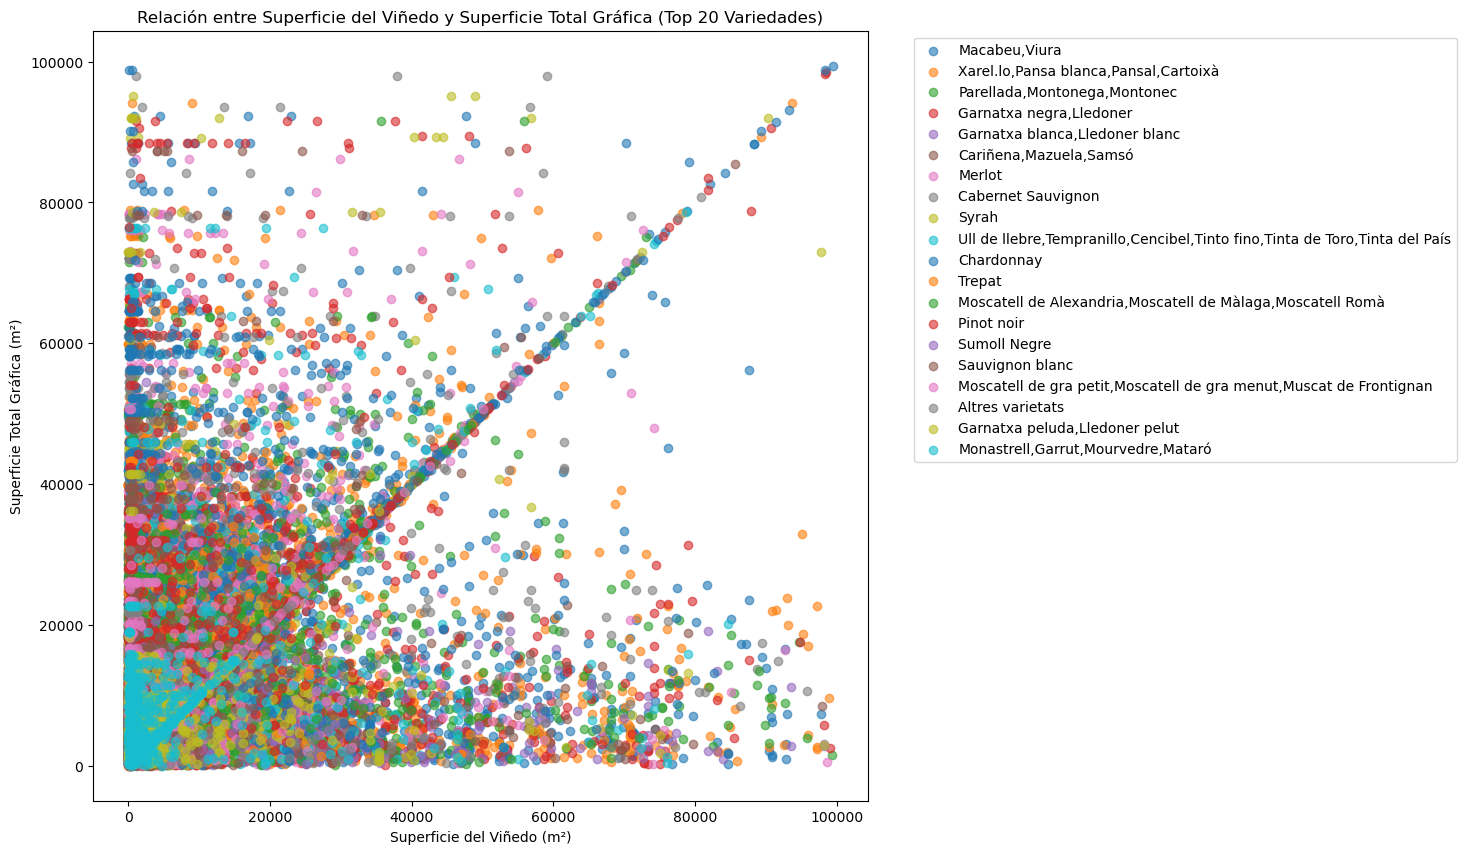

In [13]:
top_variety_data = data_cleaned[data_cleaned['VARIETAT'].isin(top_varieties.index)]

plt.figure(figsize=(10, 10))
for variety in top_varieties.index:
    subset = top_variety_data[top_variety_data['VARIETAT'] == variety]
    plt.scatter(subset['SUP_VI_RECINTE'], subset['SUP_TOTAL_GRAFICA'], label=variety, alpha=0.6)

plt.title('Relación entre Superficie del Viñedo y Superficie Total Gráfica (Top 20 Variedades)')
plt.xlabel('Superficie del Viñedo (m²)')
plt.ylabel('Superficie Total Gráfica (m²)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.show()


**Relación entre Superficie del Viñedo y Superficie Total Gráfica**

**Tendencia General:** Observamos una tendencia positiva entre la superficie del viñedo y la superficie total gráfica. Esto sugiere que, en general, a medida que aumenta la superficie del viñedo, también lo hace la superficie total gráfica, confirmando la correlación moderada (0.36) identificada anteriormente.

**Diversidad de Variedades:** Las diferentes variedades de uvas están distribuidas de manera dispersa a lo largo de la gráfica, lo que indica que no hay una fuerte concentración de una sola variedad en un rango específico de superficies. Esto sugiere una diversidad considerable en el tamaño de los viñedos independientemente de la variedad de uva.

**Concentración de Datos:** Hay una mayor concentración de puntos en las superficies más pequeñas (menos de 20,000 m²), lo cual refuerza la observación de que muchas parcelas son pequeñas o medianas.

**Outliers:** Se pueden observar algunos outliers con superficies muy grandes, lo que puede influir en la media y desviación estándar. Estos outliers también aparecen distribuidos entre varias variedades.

### 4.4 Gráfico de Líneas Suavizadas para la Producción a lo Largo del Tiempo


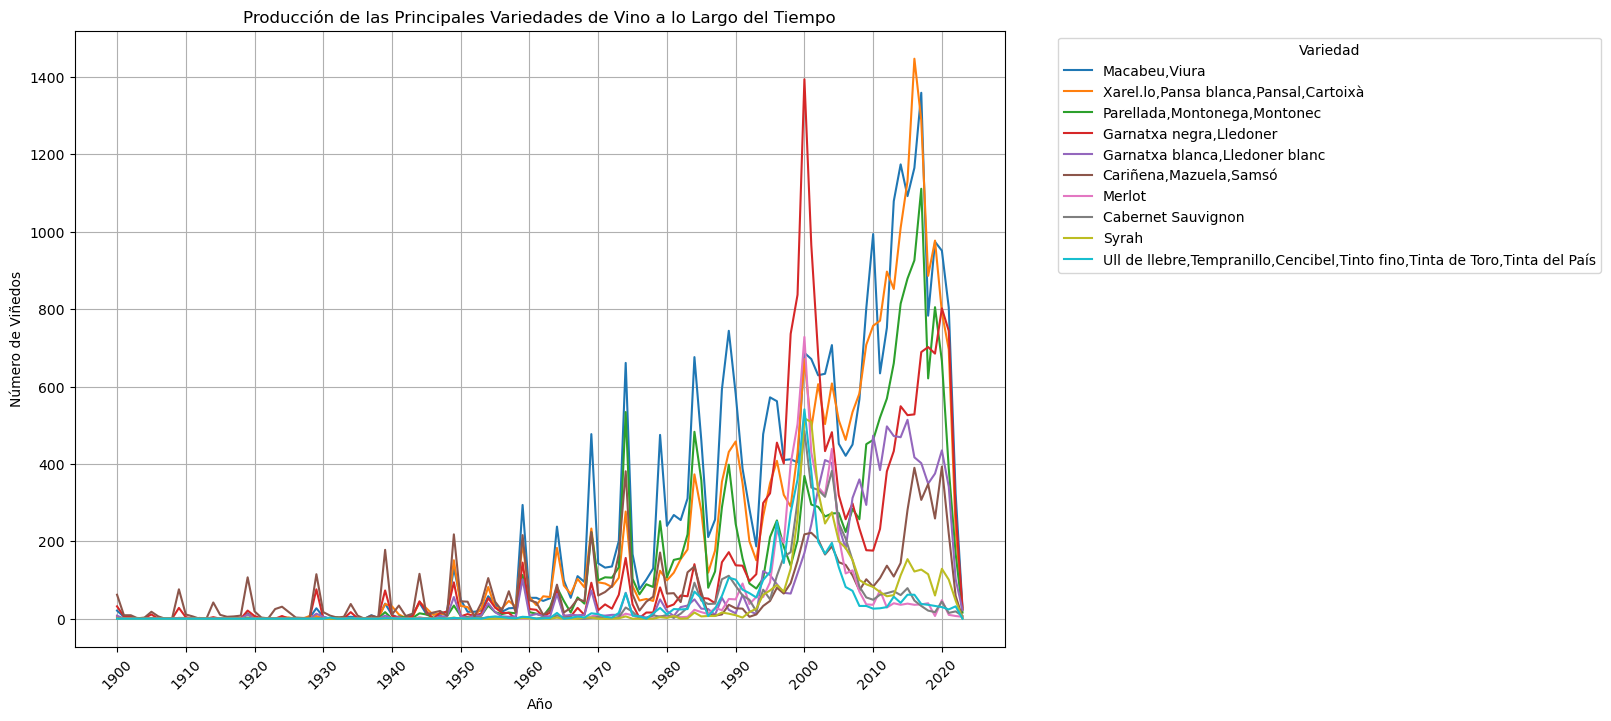

In [15]:
# Obtener las 10 variedades más comunes en general
top_varieties = data_cleaned['VARIETAT'].value_counts().nlargest(10).index

# Filtrar el dataset para quedarse solo con las 10 variedades más comunes
filtered_data = data_cleaned[data_cleaned['VARIETAT'].isin(top_varieties)]

# Agrupar los datos por año y variedad, y contar el número de registros
yearly_counts = filtered_data.groupby(['CAMPANYA', 'VARIETAT']).size().unstack(fill_value=0)

# Crear el gráfico de líneas suavizadas
plt.figure(figsize=(12, 8))

# Generar un rango de años para la interpolación
years = np.arange(yearly_counts.index.min(), yearly_counts.index.max() + 1)

for variety in top_varieties:
    y = yearly_counts[variety].reindex(years, fill_value=0)  # Asegurar que todos los años estén presentes
    x = years  # Usamos el rango completo de años
    # Crear una función de interpolación
    f = interp1d(x, y, kind='cubic', fill_value='extrapolate')
    # Generar puntos suavizados
    y_smooth = f(years)
    plt.plot(years, y_smooth, label=variety)

# Ajustar los intervalos del eje x para que muestren los años cada 10 años
plt.xticks(np.arange(yearly_counts.index.min(), yearly_counts.index.max() + 1, 10), rotation=45)  # Mostrar cada 10 años

plt.title('Producción de las Principales Variedades de Vino a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Viñedos')
plt.legend(title='Variedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Producción de las Principales Variedades de Vino a lo Largo del Tiempo**

**Crecimiento Histórico:**

Se observa un crecimiento gradual en la producción de vino desde principios del siglo XX, con un incremento más pronunciado a partir de la década de 1970.

**Picos de Producción:**

Hay picos significativos en la producción de vino en los años 1990 y principios de los 2000, seguidos por una disminución en los últimos años.

**Variedades Predominantes:**

Macabeu y Viura: Muestran un incremento constante y se mantienen como las variedades más producidas a lo largo del tiempo.

**Xarel.lo, Pansa blanca, Pansal, Cartoixà:** También destacan por su alta producción, especialmente a partir de la década de 1980.

**Garnatxa negra y Lledoner:** Presentan picos significativos alrededor del año 2000.

**Variedad y Diversidad:**

A partir de la década de 1980, hay un aumento en la diversidad de las variedades producidas, lo que indica una mayor diversidad en la producción vitivinícola en Catalunya.

**Tendencias Recientes:**

La producción parece haber disminuido en los últimos años, posiblemente debido a cambios en la demanda, políticas agrícolas o factores climáticos.

# 5. Conclusiones

El análisis de los viñedos en Catalunya revela una **notable diversidad** tanto en la **superficie** de los viñedos como en las **variedades de uva** cultivadas. La variabilidad en el tamaño de las parcelas es considerable, abarcando desde pequeños viñedos hasta grandes extensiones de tierra. La mayoría de los viñedos son relativamente pequeños, aunque existen algunas parcelas significativamente más grandes que influyen en el promedio, sugiriendo la **coexistencia** de **pequeños productores** y **grandes operaciones vitícolas**.

Las combinaciones de variedades de uva como **"Macabeu, Viura" y "Xarel.lo, Pansa blanca, Pansal, Cartoixà"** son especialmente comunes, reflejando una preferencia por ciertas mezclas en la producción de vino en Catalunya. Al mismo tiempo, las variedades individuales como **Macabeu y Viura** destacan como las más prevalentes, lo que demuestra una fuerte tradición en la producción de estas uvas específicas.

A lo largo del tiempo, la producción de vino ha mostrado una **tendencia de crecimiento**, con picos notables en las décadas de 1990 y 2000, aunque ha **disminuido** en los **últimos años**. Estos cambios pueden estar influenciados por diversos factores económicos, políticos y climáticos.

Existe una **correlación moderada** entre la **superficie** del **viñedo** y la superficie **total** gráfica, lo que indica que, en general, los viñedos más grandes tienden a tener áreas de cultivo más extensas. Sin embargo, la **diversidad** en el **tamaño** de los viñedos es significativa **independientemente** de la **variedad** de uva, lo que refleja una **rica** variedad en las prácticas de **cultivo**.

En resumen, la producción vinícola en Catalunya es **diversa y dinámica**, con una amplia gama de tamaños de viñedos y variedades de uva. Este análisis proporciona una base sólida para comprender las tendencias y patrones en la viticultura catalana, ofreciendo insights valiosos para la planificación agrícola, la conservación del suelo, y las estrategias de producción en la industria vinícola.



# Referencias

- Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/
- Matplotlib Documentation: https://matplotlib.org/stable/contents.html
- NumPy Documentation: https://numpy.org/doc/stable/
- SciPy Documentation: https://docs.scipy.org/doc/scipy/
- Dataset Source: [Registre Vitivinícola de Catalunya](https://datos.gob.es/en/catalogo/a09002970-registro-vitivinicola-de-cataluna-e-rvc)